In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataPath = '../data/images'
metadataPath = '../data/styles.csv'

In [6]:
df = pd.read_csv(metadataPath, on_bad_lines='skip')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [8]:
df.dropna()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [9]:
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

UNIVARIATE ANALYSIS

In [10]:
df['masterCategory'].value_counts()

masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

In [11]:
df['subCategory'].value_counts()

subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Sk

In [12]:
df['articleType'].value_counts()

articleType
Tshirts                7067
Shirts                 3217
Casual Shoes           2845
Watches                2542
Sports Shoes           2036
                       ... 
Cushion Covers            1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: count, Length: 143, dtype: int64

In [13]:
df['season'].value_counts()

season
Summer    21472
Fall      11431
Winter     8517
Spring     2983
Name: count, dtype: int64

In [14]:
#### Homogenizing the data on the basis of the articleType 

# df['articleType'].value_counts().quantile([0.75])

percentile = 260

In [15]:
workingdf = df[df.groupby('articleType')['articleType'].transform('count')> percentile]

<Axes: xlabel='articleType'>

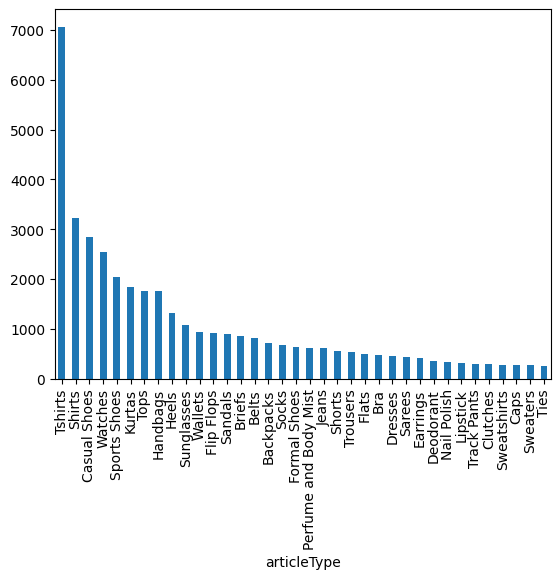

In [16]:
workingdf['articleType'].value_counts().plot(kind = 'bar')

In [17]:
workingdf = workingdf.groupby('articleType').apply(lambda x : x.sample(percentile)).reset_index(drop = True)

/tmp/ipykernel_82575/2528409570.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  workingdf = workingdf.groupby('articleType').apply(lambda x : x.sample(percentile)).reset_index(drop = True)


<Axes: xlabel='articleType'>

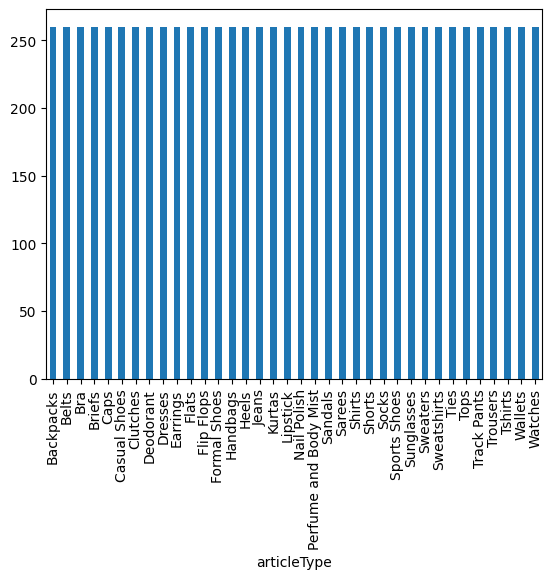

In [18]:
workingdf['articleType'].value_counts().plot(kind = 'bar')

In [19]:
for col in workingdf.columns:
    print(workingdf[col].value_counts())

id
10312    1
44988    1
45249    1
29450    1
51523    1
        ..
5252     1
6553     1
37693    1
4689     1
7075     1
Name: count, Length: 9360, dtype: int64
gender
Women     4357
Men       4238
Unisex     562
Girls      110
Boys        93
Name: count, dtype: int64
masterCategory
Apparel          3640
Accessories      2853
Footwear         1820
Personal Care    1039
Free Items          8
Name: count, dtype: int64
subCategory
Topwear                     1562
Shoes                       1300
Bottomwear                  1038
Bags                         778
Innerwear                    520
Fragrance                    516
Belts                        260
Watches                      260
Headwear                     260
Flip Flops                   260
Jewellery                    260
Nails                        260
Lips                         260
Saree                        260
Sandal                       260
Socks                        260
Eyewear                      260
Wall

In [21]:
workingdf['id'].to_csv('../data/imgs.csv', header= False, index=False)